## Machine Learning Models
#### CSCI 4502 Final Project
#### Author: Ethan Meyer

In [24]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import GaussianNB

from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn import preprocessing

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import ShuffleSplit

import warnings
warnings.filterwarnings('ignore')

# Importing Clean Data

In [102]:
full_joined_df = pd.read_csv("../data/Pre-Processed-Data/ModelData.csv", index_col=0)
target = full_joined_df['WinnerLabel']
full_joined_df.head()

targets = full_joined_df['WinnerLabel']

In [406]:
full_joined_df[['Season','DayNum','WinnerLabel','A_avg_Score','B_avg_Score']].head()

,Season,DayNum,WinnerLabel,A_avg_Score,B_avg_Score
0,2003,134,0.0,72.800000,71.206897
1,2003,136,1.0,85.214286,67.793103
2,2003,136,0.0,74.517241,75.965517
3,2003,136,1.0,79.344828,79.242424
4,2003,136,1.0,74.482759,72.400000


In [5]:
drop_cols = ['Season','DayNum','WinnerLabel','ATeamID','AScore','BTeamID','BScore','NumOT']
feature_df = full_joined_df.drop(columns=drop_cols,axis=1)
feature_df.head()

,A_NumWins,A_avg_Score,A_avg_FGM,A_avg_FGA,A_avg_FGM3,A_avg_FGA3,A_avg_FTM,A_avg_FTA,A_avg_OR,A_avg_DR,...,B_avg_DefPtsPos,B_avg_NetPtsPos,B_avg_AstP,B_NumLosses,A_OrdinalRank,B_OrdinalRank,A_Seed,B_Seed,A_WinPct,B_WinPct
0,18.0,72.800000,24.733333,55.266667,5.933333,18.500000,17.400000,28.066667,13.166667,24.800000,...,1.122992,-0.099691,0.188002,16.0,239.281250,240.343750,16,16,0.600000,0.448276
1,25.0,85.214286,30.321429,65.714286,7.035714,20.071429,17.535714,25.000000,15.178571,27.642857,...,0.967096,0.071297,0.217935,10.0,2.676471,153.125000,1,16,0.892857,0.655172
2,23.0,74.517241,26.275862,60.000000,7.000000,20.068966,14.965517,22.896552,14.068966,25.965517,...,0.999149,0.109800,0.227179,11.0,21.705882,36.000000,7,10,0.793103,0.620690
3,23.0,79.344828,26.620690,52.689655,6.827586,17.931034,19.275862,25.172414,10.586207,23.275862,...,0.939856,0.211275,0.243801,4.0,45.687500,20.735294,11,6,0.793103,0.878788
4,21.0,74.482759,27.344828,58.724138,6.413793,17.034483,13.379310,19.517241,11.241379,24.379310,...,1.023209,0.061666,0.218855,12.0,36.406250,50.312500,8,9,0.724138,0.600000


In [6]:
# Creating Difference in Features Data Frame
feature_difference_df = pd.DataFrame()
feature_difference_df['NumWins_diff'] = feature_df['A_NumWins'] - feature_df['B_NumWins']
feature_difference_df['NumLosses_diff'] = feature_df['A_NumLosses'] - feature_df['B_NumLosses']
feature_difference_df['WinPct_diff'] = feature_df['A_WinPct'] - feature_df['B_WinPct']
feature_difference_df['PPG_diff'] = feature_df['A_avg_Score'] - feature_df['B_avg_Score']
feature_difference_df['FGM_diff'] = feature_df['A_avg_FGM'] - feature_df['B_avg_FGM']
feature_difference_df['FGA_diff'] = feature_df['A_avg_FGA'] - feature_df['B_avg_FGA']
feature_difference_df['FGM3_diff'] = feature_df['A_avg_FGM3'] - feature_df['B_avg_FGM3']
feature_difference_df['FGA3_diff'] = feature_df['A_avg_FGA3'] - feature_df['B_avg_FGA3']
feature_difference_df['FTM_diff'] = feature_df['A_avg_FTM'] - feature_df['B_avg_FTM']
feature_difference_df['FTA_diff'] = feature_df['A_avg_FTA'] - feature_df['B_avg_FTA']
feature_difference_df['OR_diff'] = feature_df['A_avg_OR'] - feature_df['B_avg_OR']
feature_difference_df['DR_diff'] = feature_df['A_avg_DR'] - feature_df['B_avg_DR']
feature_difference_df['Ast_diff'] = feature_df['A_avg_Ast'] - feature_df['B_avg_Ast']
feature_difference_df['TO_diff'] = feature_df['A_avg_TO'] - feature_df['B_avg_TO']
feature_difference_df['Stl_diff'] = feature_df['A_avg_Stl'] - feature_df['B_avg_Stl']
feature_difference_df['Blk_diff'] = feature_df['A_avg_Blk'] - feature_df['B_avg_Blk']
feature_difference_df['PF_diff'] = feature_df['A_avg_PF'] - feature_df['B_avg_PF']
feature_difference_df['FGPct_diff'] = feature_df['A_avg_FGPct'] - feature_df['B_avg_FGPct']
feature_difference_df['FG3Pct_diff'] = feature_df['A_avg_FG3Pct'] - feature_df['B_avg_FG3Pct']
feature_difference_df['EFGP_diff'] = feature_df['A_avg_EFGP'] - feature_df['B_avg_EFGP']
feature_difference_df['TP_diff'] = feature_df['A_avg_TP'] - feature_df['B_avg_TP']
feature_difference_df['ORP_diff'] = feature_df['A_avg_ORP'] - feature_df['B_avg_ORP']
feature_difference_df['DRP_diff'] = feature_df['A_avg_DRP'] - feature_df['B_avg_DRP']
feature_difference_df['RP_diff'] = feature_df['A_avg_RP'] - feature_df['B_avg_RP']
feature_difference_df['FTR_diff'] = feature_df['A_avg_FTR'] - feature_df['B_avg_FTR']
feature_difference_df['FTAR_diff'] = feature_df['A_avg_FTAR'] - feature_df['B_avg_FTAR']
feature_difference_df['TSP_diff'] = feature_df['A_avg_TSP'] - feature_df['B_avg_TSP']
feature_difference_df['Pos_diff'] = feature_df['A_avg_Pos'] - feature_df['B_avg_Pos']
feature_difference_df['OffPtsPos_diff'] = feature_df['A_avg_OffPtsPos'] - feature_df['B_avg_OffPtsPos']
feature_difference_df['DefPtsPos_diff'] = feature_df['A_avg_DefPtsPos'] - feature_df['B_avg_DefPtsPos']
feature_difference_df['NetPtsPos_diff'] = feature_df['A_avg_NetPtsPos'] - feature_df['B_avg_NetPtsPos']
feature_difference_df['AstP_diff'] = feature_df['A_avg_AstP'] - feature_df['B_avg_AstP']
feature_difference_df['OrdinalRank_diff'] = feature_df['A_OrdinalRank'] - feature_df['B_OrdinalRank']
feature_difference_df['Seed_diff'] = feature_df['A_Seed'] - feature_df['B_Seed']


feature_difference_df.head()

,NumWins_diff,NumLosses_diff,WinPct_diff,PPG_diff,FGM_diff,FGA_diff,FGM3_diff,FGA3_diff,FTM_diff,FTA_diff,...,FTR_diff,FTAR_diff,TSP_diff,Pos_diff,OffPtsPos_diff,DefPtsPos_diff,NetPtsPos_diff,AstP_diff,OrdinalRank_diff,Seed_diff
0,5.0,-4.0,0.151724,1.593103,0.354023,-1.526437,-0.549425,0.500000,1.434483,7.135632,...,0.042472,0.152277,11761.181609,-0.279669,0.022172,-0.121670,0.143843,0.014735,-1.062500,0
1,6.0,-7.0,0.237685,17.421182,5.493842,9.852217,1.759852,4.588670,4.673645,5.448276,...,0.037130,0.031691,107964.332512,10.731360,0.082223,-0.040683,0.122906,0.013217,-150.448529,-15
2,5.0,-5.0,0.172414,-1.448276,-0.931034,3.103448,3.000000,7.482759,-2.586207,-3.310345,...,-0.053970,-0.071937,400.413793,1.073931,-0.040473,-0.053821,0.013348,0.011253,-14.294118,-3
3,-6.0,2.0,-0.085684,0.102403,-2.076280,-4.764890,-1.142111,-2.553814,5.397074,5.142111,...,0.124461,0.127689,-9497.456635,2.647394,-0.040235,0.086365,-0.126600,-0.025458,24.952206,5
4,3.0,-4.0,0.124138,2.082759,3.011494,5.390805,-1.552874,-5.465517,-2.387356,-0.949425,...,-0.057522,-0.039185,23262.262069,3.441223,-0.020934,-0.026102,0.005169,0.008755,-13.906250,-1


# Models

### Logistic Regression

In [90]:
LR_Pipeline = Pipeline([
    ('scale', preprocessing.StandardScaler()),
    ('pca', PCA()),
    ('logreg', LogisticRegression())
])


LR_Parameters = {
    'logreg__penalty' : ['l1','l2'], 
    'logreg__C'       : np.logspace(-3,3,7),
    'logreg__solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

shuffle_split = ShuffleSplit(n_splits=10,test_size=.2)


# LogLoss Scoring

LR_logloss_model = GridSearchCV(LR_Pipeline,                    
                   param_grid = LR_Parameters,   
                   scoring='neg_log_loss',        
                   cv=shuffle_split)                     

LR_logloss_model.fit(feature_difference_df,target)

print("LR LogLoss Tuned Hyperparameters :", LR_logloss_model.best_params_)
print("LogLoss :",-LR_logloss_model.best_score_)

best_LR_logloss_model = LogisticRegression(C = LR_logloss_model.best_params_['logreg__C'], 
                            penalty = LR_logloss_model.best_params_['logreg__penalty'], 
                            solver = LR_logloss_model.best_params_['logreg__solver'])




# Accuracy Scoring

LR_acc_model = GridSearchCV(LR_Pipeline,                    
                   param_grid = LR_Parameters,   
                   scoring='accuracy',        
                   cv=shuffle_split)                     

LR_acc_model.fit(feature_difference_df,target)

print("LR Accuracy Tuned Hyperparameters :", LR_acc_model.best_params_)
print("Accuracy :",LR_acc_model.best_score_)

best_LR_acc_model = LogisticRegression(C = LR_acc_model.best_params_['logreg__C'], 
                            penalty = LR_acc_model.best_params_['logreg__penalty'], 
                            solver = LR_acc_model.best_params_['logreg__solver'])

LR LogLoss Tuned Hyperparameters : {'logreg__C': 0.1, 'logreg__penalty': 'l2', 'logreg__solver': 'liblinear'}
LogLoss : 0.5504654850239427
LR Accuracy Tuned Hyperparameters : {'logreg__C': 1.0, 'logreg__penalty': 'l1', 'logreg__solver': 'liblinear'}
Accuracy : 0.7072649572649572


### SVM

In [323]:
SVM_Pipeline = Pipeline([
    ('scale', preprocessing.StandardScaler()),
    ('pca', PCA()),
    ('svm', SVC(probability=True))
])

SVM_Parameters = {
    'svm__gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
    'svm__kernel': ['sigmoid','rbf'],
    'svm__C': [0.1, 1, 10, 100, 1000],
}

shuffle_split = ShuffleSplit(n_splits=10,test_size=.2)

# LogLoss Scoring

SVM_logloss_model = GridSearchCV(SVM_Pipeline,                    
                   param_grid = SVM_Parameters,   
                   scoring='neg_log_loss',        
                   cv=shuffle_split)                     

SVM_logloss_model.fit(feature_difference_df,target)

print("SVM LogLoss Tuned Hyperparameters :", SVM_logloss_model.best_params_)
print("LogLoss :",-SVM_logloss_model.best_score_)

best_SVM_logloss_model = SVC(probability = True,
                             C = SVM_logloss_model.best_params_['svm__C'], 
                            gamma = SVM_logloss_model.best_params_['svm__gamma'], 
                            kernel = SVM_logloss_model.best_params_['svm__kernel'])

# Accuracy Scoring
SVM_acc_model = GridSearchCV(SVM_Pipeline,                    
                   param_grid = SVM_Parameters,   
                   scoring='accuracy',        
                   cv=shuffle_split)                     

SVM_acc_model.fit(feature_difference_df,target)

print("SVM Accuracy Tuned Hyperparameters :", SVM_acc_model.best_params_)
print("Accuracy :",SVM_acc_model.best_score_)

best_SVM_acc_model = SVC(probability = True,C = SVM_acc_model.best_params_['svm__C'], 
                            gamma = SVM_acc_model.best_params_['svm__gamma'], 
                            kernel = SVM_acc_model.best_params_['svm__kernel'])

SVM LogLoss Tuned Hyperparameters : {'svm__C': 100, 'svm__gamma': 0.0001, 'svm__kernel': 'rbf'}
LogLoss : 0.5301127628819547
SVM Accuracy Tuned Hyperparameters : {'svm__C': 100, 'svm__gamma': 0.0001, 'svm__kernel': 'rbf'}
Accuracy : 0.7230769230769231


### K Nearest Neighbors

In [82]:
KNN_Pipeline = Pipeline([
    ('scale', preprocessing.StandardScaler()),
    ('pca', PCA()),
    ('knn', KNeighborsClassifier())
])

KNN_Parameters = {
    'knn__n_neighbors': range(1,20), 
}

shuffle_split = ShuffleSplit(n_splits=10,test_size=.2)

# LogLoss Scoring

KNN_logloss_model = GridSearchCV(KNN_Pipeline,                    
                   param_grid = KNN_Parameters,   
                   scoring='neg_log_loss',        
                   cv=shuffle_split)                     

KNN_logloss_model.fit(feature_difference_df,target)

print("KNN LogLoss Tuned Hyperparameters :", KNN_logloss_model.best_params_)
print("LogLoss :",-KNN_logloss_model.best_score_)

best_KNN_logloss_model = KNeighborsClassifier(n_neighbors=KNN_logloss_model.best_params_['knn__n_neighbors'])

# Accuracy Scoring
KNN_acc_model = GridSearchCV(KNN_Pipeline,                    
                   param_grid = KNN_Parameters,   
                   scoring='accuracy',        
                   cv=shuffle_split)                     

KNN_acc_model.fit(feature_difference_df,target)

print("KNN Accuracy Tuned Hyperparameters :", KNN_acc_model.best_params_)
print("Accuracy :",KNN_acc_model.best_score_)

best_KNN_acc_model = KNeighborsClassifier(n_neighbors=KNN_acc_model.best_params_['knn__n_neighbors'])


KNN LogLoss Tuned Hyperparameters : {'knn__n_neighbors': 19}
LogLoss : 0.6066754154677698
KNN Accuracy Tuned Hyperparameters : {'knn__n_neighbors': 18}
Accuracy : 0.6786324786324787


# Uniform Betting Strategy

In [22]:
# Helpful Functions

def get_bet_on_team(row):
    if row['Prediction'] == 1:
        return row['ATeamID']
    else:
        return row['BTeamID']
    
def calc_net_payout(moneyline, amount_bet = 1, correct=True):
    if correct:
        if moneyline < 0:
            return -amount_bet*(100/moneyline)
        else:
            return amount_bet*(moneyline/100)
    else:
        return -amount_bet
    
def calc_implied_p(moneyline):
    if moneyline < 0:
        return (-1*(moneyline)) / (-1*(moneyline) + 100)
    else:
        return 100 / (moneyline + 100)
    
def test_model(model, features, targets):
    x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size=0.2)

    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    
    test_bet_output = full_joined_df.iloc[y_test.index][['Season', 'DayNum', 'ATeamID', 'BTeamID','WinnerLabel']]
    test_bet_output['Prediction'] = y_pred
    test_bet_output['Correct?'] = test_bet_output['WinnerLabel'] == test_bet_output['Prediction']
    test_bet_output['BetOnTeamID'] = test_bet_output.apply(get_bet_on_team, axis=1)
    
    test_bet_full_df = test_bet_output.merge(moneyline_df, how="left",  
                                         left_on=["Season","DayNum","BetOnTeamID"], right_on=["Season","DayNum","TeamID"])[['Season','BetOnTeamID','Correct?','Moneyline']]

    test_bet_full_df = test_bet_full_df.dropna()
    
    initial_investment = len(test_bet_full_df.index)
    running_balanace = initial_investment
    
    for idx, row in test_bet_full_df.iterrows():
        if row["Correct?"]:
            running_balanace += calc_net_payout(row["Moneyline"])
        else:
            running_balanace -= 1

    ROI = (running_balanace - initial_investment)/initial_investment
    accuracy = sum(y_pred == y_test)/len(y_pred)
    return ROI, accuracy
    

# Enhanced Betting Strategy

In [103]:
# Standardizing data to be compatable with already constructed models
scaler = preprocessing.StandardScaler().fit(feature_difference_df)
scaled_feature_diff_df = scaler.transform(feature_difference_df)
x_train, x_test, y_train, y_test = train_test_split(scaled_feature_diff_df, targets, test_size=0.2)

In [25]:
def get_bet_Team_from_edge(edge_a, edge_b):
    if edge_a > 0:
        return 1
    elif edge_b > 0:
        return 0
    else:
        return None

def get_edge_from_bet_Team(bet_on_team, edge_a, edge_b):
    if pd.isna(bet_on_team):
        return None
    elif bet_on_team == 1:
        return edge_a
    else:
        return edge_b
    
def get_moneyline_from_bet_Team(bet_on_team, moneyline_a, moneyline_b):
    if pd.isna(bet_on_team):
        return None
    elif bet_on_team == 1:
        return moneyline_a
    else:
        return moneyline_b    
    
def check_bet_correct(bet_on_team, winner_label):
    if pd.isna(bet_on_team):
        return None
    else:
        return bet_on_team == winner_label

    

def test_enhanced_betting(model, feature_df, targets):
    x_train, x_test, y_train, y_test = train_test_split(feature_df, targets, test_size=0.2)
    
    model.fit(x_train, y_train)
    
    y_prob = model.predict_proba(x_test)

    B_prob = [array[0] for array in y_prob]
    A_prob = [array[1] for array in y_prob]

    test_bet_output = full_joined_df.iloc[y_test.index][['Season', 'DayNum', 'ATeamID', 'BTeamID','WinnerLabel']]
    
    test_bet_output['P(A)'] = A_prob
    test_bet_output['P(B)'] = B_prob

    test_bet_full_df = test_bet_output.merge(moneyline_df, how="left",
                          left_on=["Season","DayNum","ATeamID"], 
                          right_on=["Season","DayNum","TeamID"]).rename(columns={"Moneyline":"A_Moneyline"})

    test_bet_full_df = test_bet_full_df.merge(moneyline_df, how="left",
                          left_on=["Season","DayNum","BTeamID"], 
                          right_on=["Season","DayNum","TeamID"]).rename(columns={"Moneyline":"B_Moneyline"})


    test_bet_full_df['Imp. P(A)'] = test_bet_full_df['A_Moneyline'].apply(calc_implied_p)
    test_bet_full_df['Imp. P(B)'] = test_bet_full_df['B_Moneyline'].apply(calc_implied_p)

    test_bet_full_df['Total Imp. P'] = test_bet_full_df['Imp. P(A)'] + test_bet_full_df['Imp. P(B)']

    test_bet_full_df['Edge(A)'] = test_bet_full_df['P(A)'] - test_bet_full_df['Imp. P(A)']
    test_bet_full_df['Edge(B)'] = test_bet_full_df['P(B)'] - test_bet_full_df['Imp. P(B)']

    test_bet_full_df['BetOnTeam'] = test_bet_full_df.apply(lambda row: get_bet_Team_from_edge(row['Edge(A)'],row['Edge(B)']), axis=1)
    test_bet_full_df['BetEdge'] = test_bet_full_df.apply(lambda row: get_edge_from_bet_Team(row['BetOnTeam'],row['Edge(A)'],row['Edge(B)']), axis=1)
    test_bet_full_df['BetMoneyline'] = test_bet_full_df.apply(lambda row: get_moneyline_from_bet_Team(row['BetOnTeam'],row['A_Moneyline'],row['B_Moneyline']), axis=1)
    test_bet_full_df['Correct?'] = test_bet_full_df.apply(lambda row: check_bet_correct(row['BetOnTeam'],row['WinnerLabel']), axis=1)    

    return test_bet_full_df
    
    test_compact_bet_full_df = test_bet_full_df[['BetOnTeam','BetMoneyline','Correct?','BetEdge']]

    initial_investment = 100
    test_compact_bet_full_df['BetAmount'] = initial_investment* (test_compact_bet_full_df['BetEdge'] / test_compact_bet_full_df['BetEdge'].sum(skipna=True))
    test_compact_bet_full_df['NetPayout'] = test_compact_bet_full_df.apply(lambda row: calc_net_payout(row['BetMoneyline'], row['BetAmount'], row['Correct?']), axis=1)

    accuracy = test_compact_bet_full_df['Correct?'].sum(skipna=True) / test_compact_bet_full_df['Correct?'].count()
    ROI = test_compact_bet_full_df['NetPayout'].sum(skipna=True) / initial_investment

    return ROI, accuracy

# Testing Models

In [23]:
# Loading betting data
moneyline_df = pd.read_csv("../data/Pre-Processed-Data/CleanedMoneylineData.csv",index_col=0)
moneyline_df.head()

,Season,DayNum,TeamID,Moneyline
0,2008,0,1263,200.0
1,2008,0,1350,-240.0
2,2008,0,1404,13000.0
3,2008,0,1272,-39000.0
4,2008,1,1205,-160.0


In [399]:
# Logistic Regression

num_trials = 500

# Trackers for basic betting strategy
LR_logloss_ROI_tracker_basic = np.empty(num_trials)
LR_logloss_accuracy_tracker_basic = np.empty(num_trials)
LR_acc_ROI_tracker_basic = np.empty(num_trials)
LR_acc_accuracy_tracker_basic = np.empty(num_trials)

# Trackers for enhanced betting strategy
LR_logloss_ROI_tracker_enh = np.empty(num_trials)
LR_logloss_accuracy_tracker_enh = np.empty(num_trials)
LR_acc_ROI_tracker_enh = np.empty(num_trials)
LR_acc_accuracy_tracker_enh = np.empty(num_trials)


for idx in range(num_trials):
    ROI, acc = test_model(best_LR_logloss_model,scaled_feature_diff_df, targets)
    LR_logloss_ROI_tracker_basic[idx] = ROI
    LR_logloss_accuracy_tracker_basic[idx] = acc
    
    ROI, acc = test_model(best_LR_acc_model,scaled_feature_diff_df, targets)
    LR_acc_ROI_tracker_basic[idx] = ROI
    LR_acc_accuracy_tracker_basic[idx] = acc
    
    ROI, acc = test_enhanced_betting(best_LR_logloss_model,scaled_feature_diff_df, targets)
    LR_logloss_ROI_tracker_enh[idx] = ROI
    LR_logloss_accuracy_tracker_enh[idx] = acc
    
    ROI, acc = test_enhanced_betting(best_LR_acc_model,scaled_feature_diff_df, targets)
    LR_acc_ROI_tracker_enh[idx] = ROI
    LR_acc_accuracy_tracker_enh[idx] = acc

In [372]:
# SVM

num_trials = 500

# Trackers for basic betting strategy
SVM_logloss_ROI_tracker_basic = np.empty(num_trials)
SVM_logloss_accuracy_tracker_basic = np.empty(num_trials)
SVM_acc_ROI_tracker_basic = np.empty(num_trials)
SVM_acc_accuracy_tracker_basic = np.empty(num_trials)

# Trackers for enhanced betting strategy
SVM_logloss_ROI_tracker_enh = np.empty(num_trials)
SVM_logloss_accuracy_tracker_enh = np.empty(num_trials)
SVM_acc_ROI_tracker_enh = np.empty(num_trials)
SVM_acc_accuracy_tracker_enh = np.empty(num_trials)


for idx in range(num_trials):
    ROI, acc = test_model(best_SVM_logloss_model,scaled_feature_diff_df, targets)
    SVM_logloss_ROI_tracker_basic[idx] = ROI
    SVM_logloss_accuracy_tracker_basic[idx] = acc
    
    ROI, acc = test_model(best_SVM_acc_model,scaled_feature_diff_df, targets)
    SVM_acc_ROI_tracker_basic[idx] = ROI
    SVM_acc_accuracy_tracker_basic[idx] = acc
    
    ROI, acc = test_enhanced_betting(best_SVM_logloss_model,scaled_feature_diff_df, targets)
    SVM_logloss_ROI_tracker_enh[idx] = ROI
    SVM_logloss_accuracy_tracker_enh[idx] = acc
    
    ROI, acc = test_enhanced_betting(best_SVM_acc_model,scaled_feature_diff_df, targets)
    SVM_acc_ROI_tracker_enh[idx] = ROI
    SVM_acc_accuracy_tracker_enh[idx] = acc

In [389]:
# KNN

num_trials = 500

# Trackers for basic betting strategy
KNN_logloss_ROI_tracker_basic = np.empty(num_trials)
KNN_logloss_accuracy_tracker_basic = np.empty(num_trials)
KNN_acc_ROI_tracker_basic = np.empty(num_trials)
KNN_acc_accuracy_tracker_basic = np.empty(num_trials)

# Trackers for enhanced betting strategy
KNN_logloss_ROI_tracker_enh = np.empty(num_trials)
KNN_logloss_accuracy_tracker_enh = np.empty(num_trials)
KNN_acc_ROI_tracker_enh = np.empty(num_trials)
KNN_acc_accuracy_tracker_enh = np.empty(num_trials)


for idx in range(num_trials):
    ROI, acc = test_model(best_KNN_logloss_model,scaled_feature_diff_df, targets)
    KNN_logloss_ROI_tracker_basic[idx] = ROI
    KNN_logloss_accuracy_tracker_basic[idx] = acc
    
    ROI, acc = test_model(best_KNN_acc_model,scaled_feature_diff_df, targets)
    KNN_acc_ROI_tracker_basic[idx] = ROI
    KNN_acc_accuracy_tracker_basic[idx] = acc
    
    ROI, acc = test_enhanced_betting(best_KNN_logloss_model,scaled_feature_diff_df, targets)
    KNN_logloss_ROI_tracker_enh[idx] = ROI
    KNN_logloss_accuracy_tracker_enh[idx] = acc
    
    ROI, acc = test_enhanced_betting(best_KNN_acc_model,scaled_feature_diff_df, targets)
    KNN_acc_ROI_tracker_enh[idx] = ROI
    KNN_acc_accuracy_tracker_enh[idx] = acc

In [427]:
results_df = pd.DataFrame({"LR logloss Accuracy Basic":LR_logloss_accuracy_tracker_basic,
                          "LR logloss ROI Basic":LR_logloss_ROI_tracker_basic,
                          "LR logloss Accuracy Enhanced":LR_logloss_accuracy_tracker_enh,
                          "LR logloss ROI Enhanced":LR_logloss_ROI_tracker_enh,
                          "LR acc Accuracy Basic":LR_acc_accuracy_tracker_basic,
                          "LR acc ROI Basic":LR_acc_ROI_tracker_basic,
                          "LR acc Accuracy Enhanced":LR_acc_accuracy_tracker_enh,
                          "LR acc ROI Enhanced":LR_acc_ROI_tracker_enh,
                           
                          "SVM logloss Accuracy Basic":SVM_logloss_accuracy_tracker_basic,
                          "SVM logloss ROI Basic":SVM_logloss_ROI_tracker_basic,
                          "SVM logloss Accuracy Enhanced":SVM_logloss_accuracy_tracker_enh,
                          "SVM logloss ROI Enhanced":SVM_logloss_ROI_tracker_enh,
                          "SVM acc Accuracy Basic":SVM_acc_accuracy_tracker_basic,
                          "SVM acc ROI Basic":SVM_acc_ROI_tracker_basic,
                          "SVM acc Accuracy Enhanced":SVM_acc_accuracy_tracker_enh,
                          "SVM acc ROI Enhanced":SVM_acc_ROI_tracker_enh,
                           
                          "KNN logloss Accuracy Basic":KNN_logloss_accuracy_tracker_basic,
                          "KNN logloss ROI Basic":KNN_logloss_ROI_tracker_basic,
                          "KNN logloss Accuracy Enhanced":KNN_logloss_accuracy_tracker_enh,
                          "KNN logloss ROI Enhanced":KNN_logloss_ROI_tracker_enh,
                          "KNN acc Accuracy Basic":KNN_acc_accuracy_tracker_basic,
                          "KNN acc ROI Basic":KNN_acc_ROI_tracker_basic,
                          "KNN acc Accuracy Enhanced":KNN_acc_accuracy_tracker_enh,
                          "KNN acc ROI Enhanced":KNN_acc_ROI_tracker_enh

                          })

results_df.head()

,LR logloss Accuracy Basic,LR logloss ROI Basic,LR logloss Accuracy Enhanced,LR logloss ROI Enhanced,LR acc Accuracy Basic,LR acc ROI Basic,LR acc Accuracy Enhanced,LR acc ROI Enhanced,SVM logloss Accuracy Basic,SVM logloss ROI Basic,...,SVM acc Accuracy Enhanced,SVM acc ROI Enhanced,KNN logloss Accuracy Basic,KNN logloss ROI Basic,KNN logloss Accuracy Enhanced,KNN logloss ROI Enhanced,KNN acc Accuracy Basic,KNN acc ROI Basic,KNN acc Accuracy Enhanced,KNN acc ROI Enhanced
0,0.709402,0.001483,0.522388,0.137225,0.717949,-0.006052,0.624060,0.222422,0.726496,0.004700,...,0.347826,-0.166044,0.675214,-0.015598,0.343949,-0.060441,0.696581,0.057852,0.411392,0.215299
1,0.683761,0.028666,0.441176,0.068812,0.743590,0.014586,0.476190,0.018558,0.764957,0.102424,...,0.500000,0.020974,0.658120,0.010402,0.406667,-0.050501,0.653846,-0.000453,0.392405,-0.072702
2,0.679487,-0.052164,0.537313,0.080366,0.696581,-0.010790,0.544118,0.052323,0.683761,-0.017402,...,0.469565,0.161442,0.623932,-0.109780,0.386503,0.479738,0.653846,-0.055491,0.320988,-0.055430
3,0.722222,0.008103,0.460526,-0.259428,0.692308,0.058449,0.421769,-0.209736,0.713675,0.011192,...,0.404110,-0.109679,0.628205,-0.121181,0.328947,-0.184337,0.670940,-0.048690,0.329268,-0.302344
4,0.709402,0.041377,0.456522,0.118001,0.705128,-0.026183,0.559441,0.048426,0.619658,-0.126970,...,0.477273,0.226024,0.645299,-0.033797,0.377358,0.216952,0.653846,-0.065050,0.401316,0.176808


In [ ]:
# Saving to csv
results_df.to_csv("../data/Results-Data/model_performance.csv")

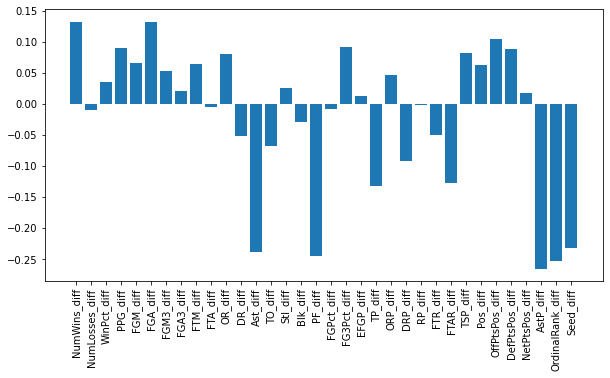

In [351]:
# plt.bar(['f','u'],[0,1])
fig = plt.figure(figsize = (10, 5))

plt.bar(list(feature_difference_df.columns),best_LR_logloss_model.coef_[0])
plt.xticks(rotation=90)
plt.show()